# HR Analytics : Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## Data introduction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
mpl.style.use('seaborn')
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('../data/aug_train.csv')
# pre_train = pd.read_csv('processing_missing_value.csv')
test = pd.read_csv('../data/aug_test.csv')
submission = pd.read_csv('../data/sample_submission.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

- enrollee_id : 후보자 고유 ID
- city: 도시 코드
- city_ development _index : 도시 개발  지수
- gender: 후보자의 성별
- relevent_experience: 관련 경험 유/무
- enrolled_university: 대학 입학 여부
- education_level: 지원자의 교육 수준
    - Primary School    초등학교 졸업
    - High School       중/고등학교 졸업
    - Graduate          학사
    - Masters           석사
    - Phd               박사
- major_discipline : 주전공
- experience: 경력(년)
- company_size: 현재 회사의 직원 수
- company_type : 현재 회사 타입
    - Pvt Ltd 비상장회사
    - Funded Startup 투자받은 스타트업
    - Public Sector 공기업
    - Early Stage Startup 초기 스타트업
    - NGO  non-governmental organization 비정부기구
- last_new_job: 현재 직장 직전 공백기
- training_hours: 교육이수시간
- target: 이직희망여부 0 – 이직을 찾고 있지 않음, 1 – 이직을 찾고 있음

## EDA (Exploratory Data Analysis) 

### missing value

In [5]:
train.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [6]:
train.fillna('NAN', inplace=True)

In [7]:
# ---> 시각화 넣기!

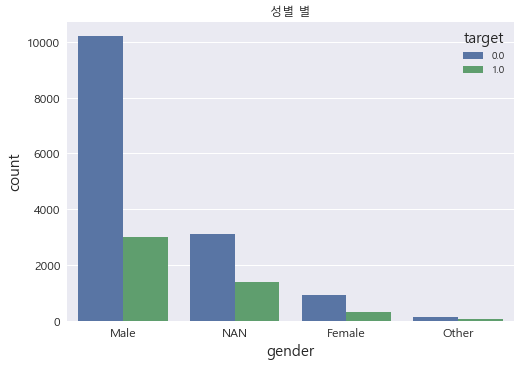

In [8]:
sns.countplot(x='gender', hue='target', data=train)
plt.title('성별 별')
plt.show()

## 학력, 전공, 대학 과정, 직무 관련 경험에 따른 이직 생각 시각화

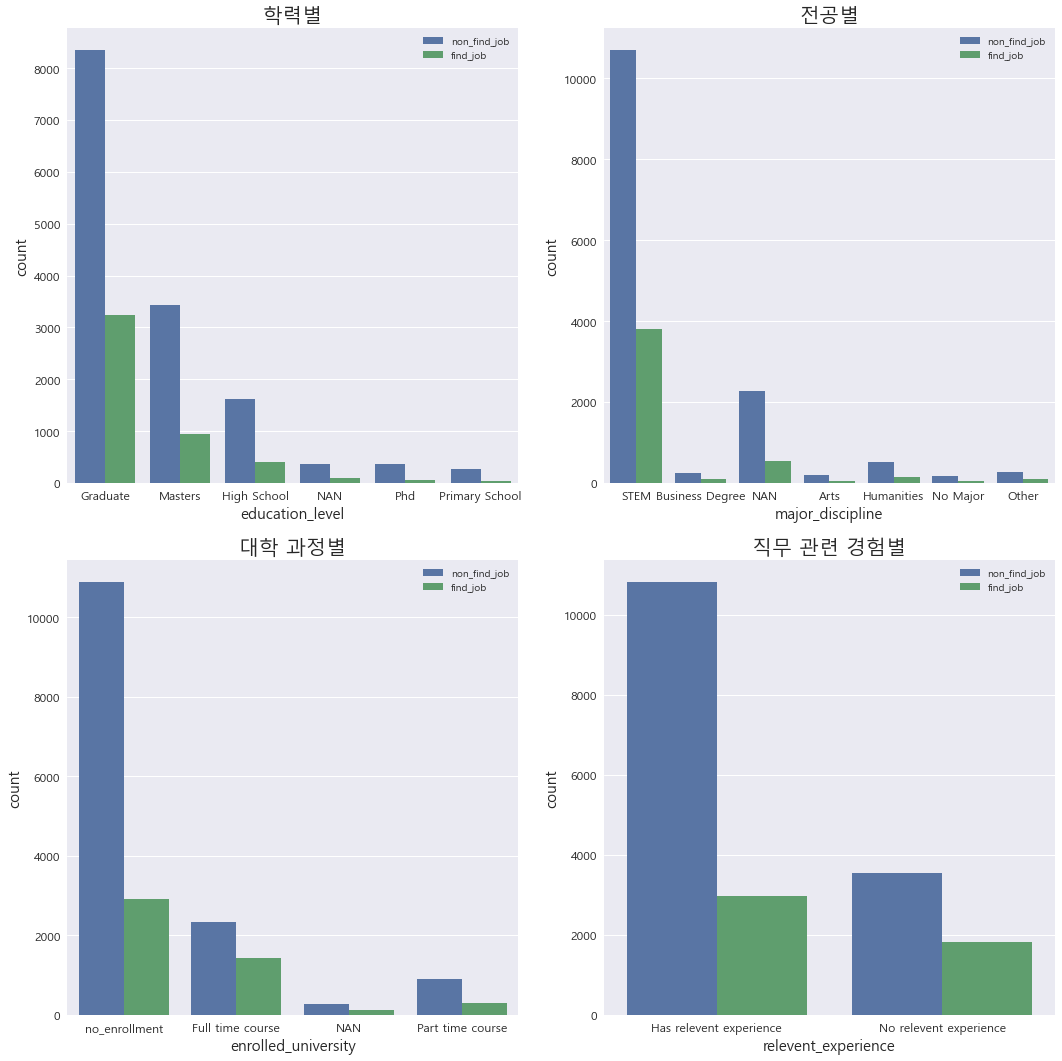

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

sns.countplot(x='education_level', hue='target', data=train, ax=axes[0, 0])
sns.countplot(x='major_discipline', hue='target', data=train, ax=axes[0,1])
sns.countplot(x='enrolled_university', hue='target', data=train, ax=axes[1,0])
sns.countplot(x='relevent_experience', hue='target', data=train, ax=axes[1, 1])

axes[0,0].set_title('학력별', fontsize=20)
axes[0,0].set_xlabel('education_level', fontsize=15)
axes[0,0].legend(['non_find_job', 'find_job'])

axes[0,1].set_title('전공별', fontsize=20)
axes[0,1].set_xlabel('major_discipline', fontsize=15)
axes[0,1].legend(['non_find_job', 'find_job'])

axes[1,0].set_title('대학 과정별', fontsize=20)
axes[1,0].set_xlabel('enrolled_university', fontsize=15)
axes[1,0].legend(['non_find_job', 'find_job'])

axes[1,1].set_title('직무 관련 경험별', fontsize=20)
axes[1,1].set_xlabel('relevent_experience', fontsize=15)
axes[1,1].legend(['non_find_job', 'find_job'])

plt.tight_layout()
plt.show()

In [8]:
toplotlist = list(train.isna().sum().sort_values(ascending=False).index)
toplotlist.remove('city')
toplotlist.remove('city_development_index')
toplotlist.remove('training_hours')
# toplotlist.remove('enrollee_id')

In [9]:
toplotlist

['target',
 'last_new_job',
 'company_type',
 'company_size',
 'experience',
 'major_discipline',
 'education_level',
 'enrolled_university',
 'relevent_experience',
 'gender',
 'enrollee_id']

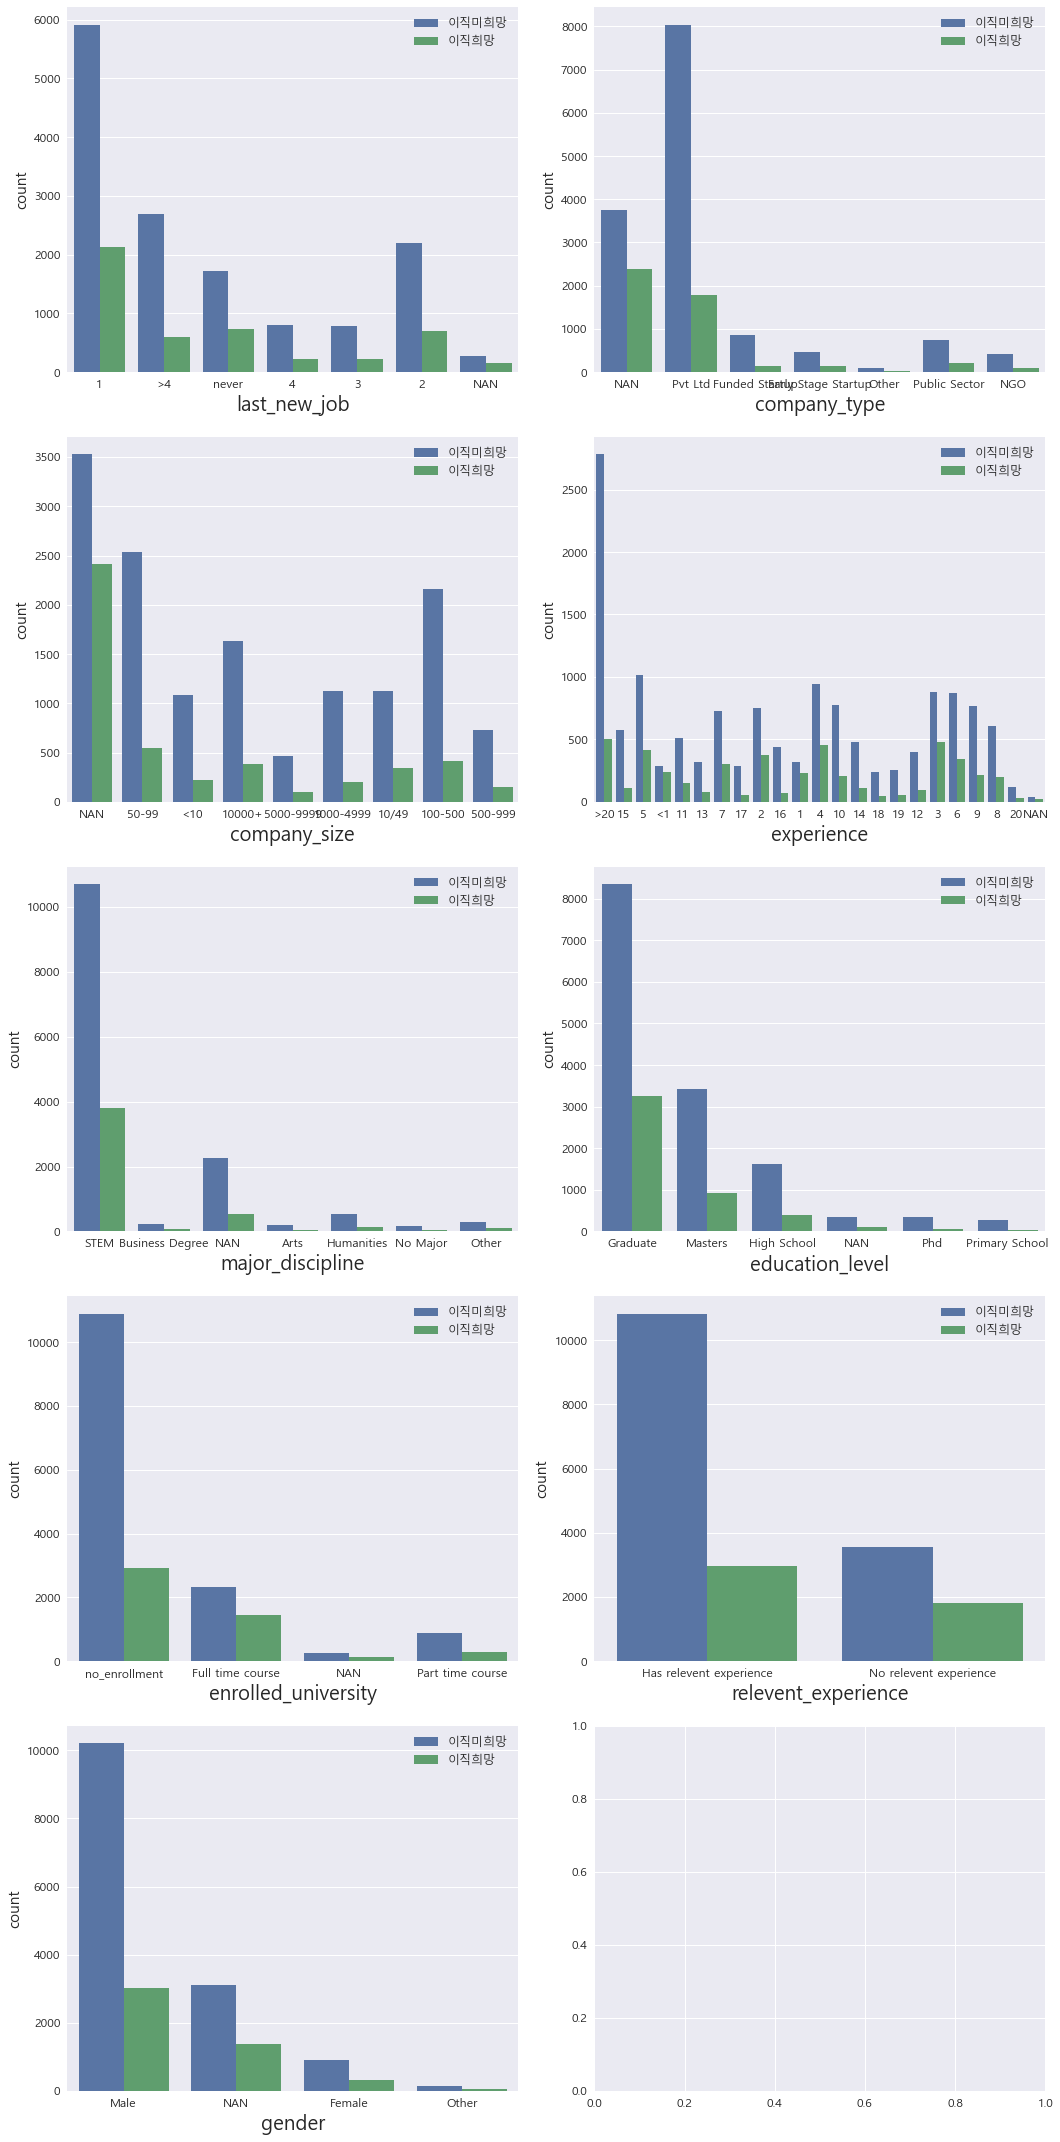

In [10]:
num_plot_lst = ['city_development_index','training_hours']
# for i in num_plot_lst:
#     toplotlist.remove(i)
toplotlist.remove('target')
toplotlist.remove('enrollee_id')
obj_plot_lst = toplotlist

n = 2 # 열 수
fig, axes = plt.subplots(nrows=(len(obj_plot_lst)+1)//2, ncols=n, figsize=(15,30))
for idx, i in enumerate(obj_plot_lst):
    sns.countplot(x=i, hue='target', data=train, ax=axes[idx//n, idx%n])
    axes[idx//n, idx%n].set_xlabel(i, fontsize=20)
    axes[idx//n, idx%n].legend(['이직미희망', '이직희망'],
                               bbox_to_anchor=(1,1), loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


# numeric변수와 target과의 관계

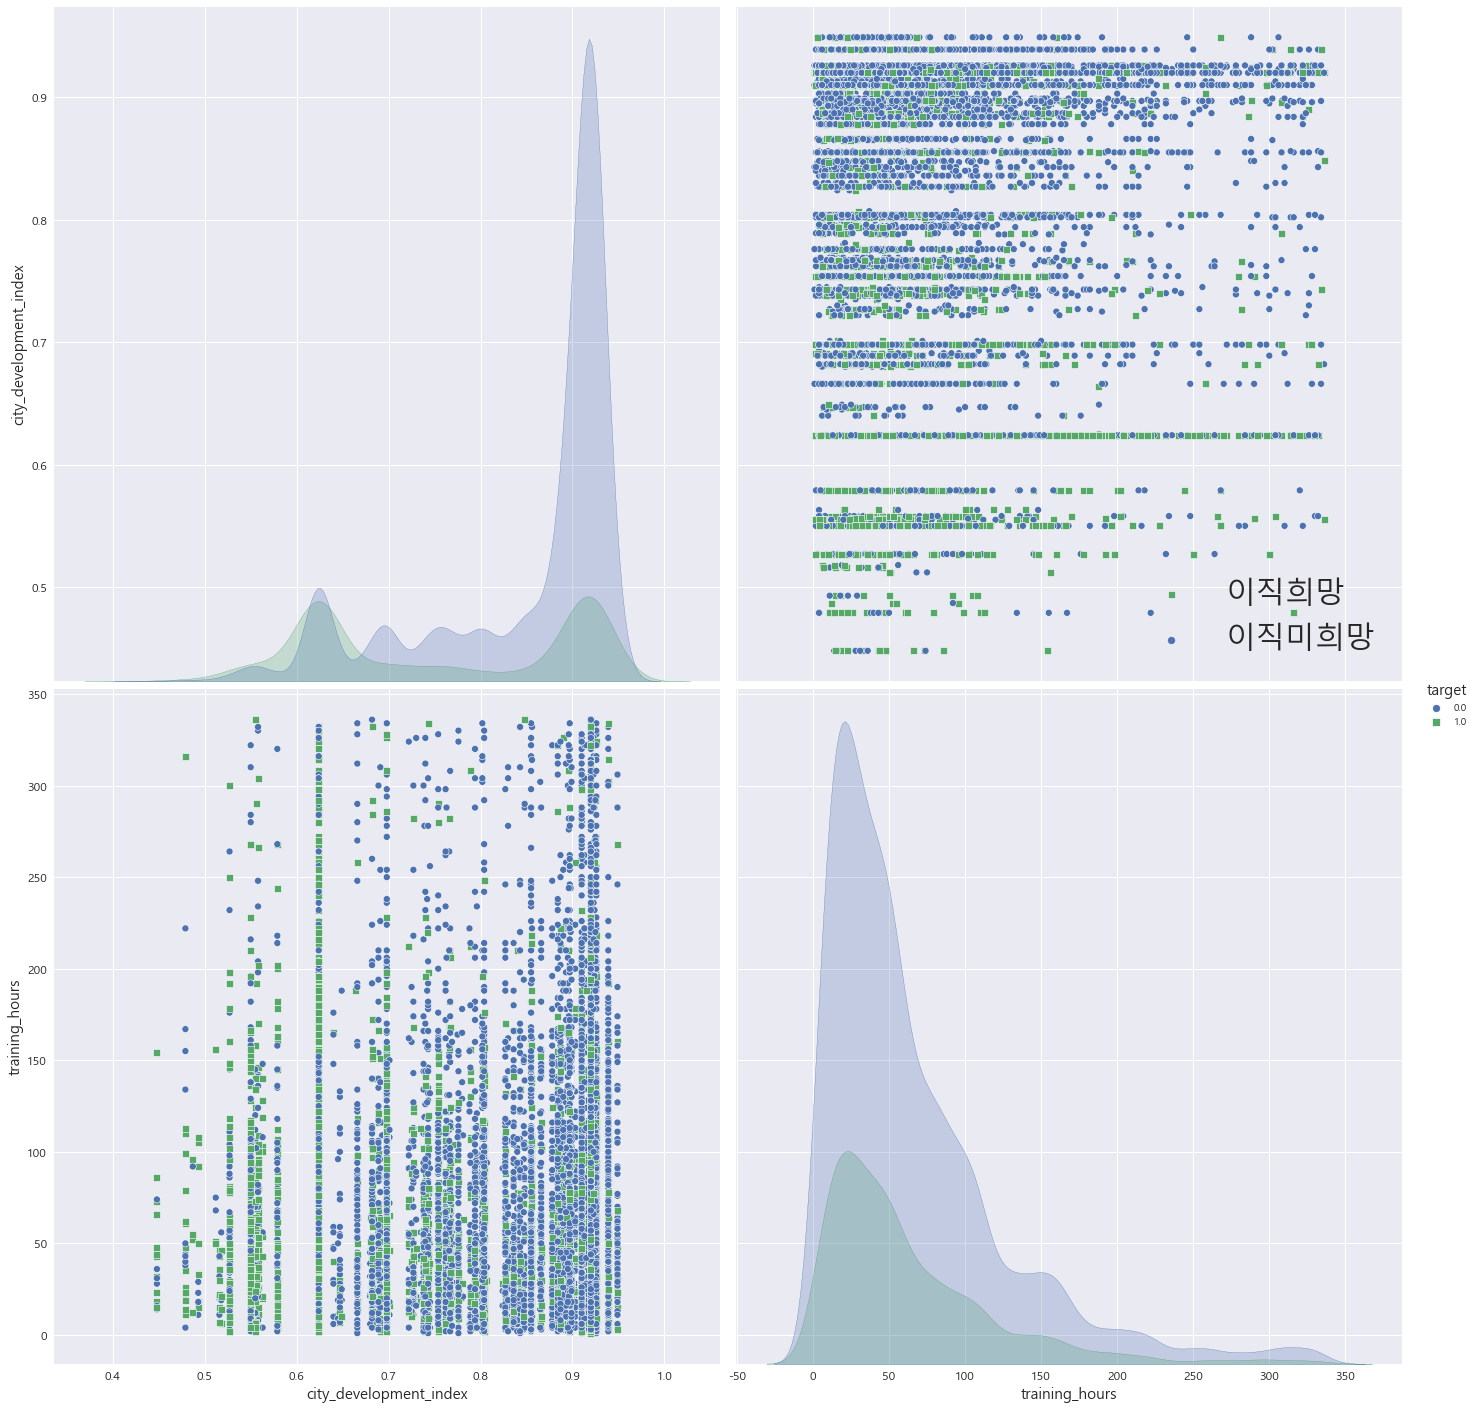

In [11]:
diff = ['city_development_index', 'training_hours']

sns.pairplot(train[diff + ['target']], hue = 'target', 
             x_vars = diff, y_vars = diff,markers=["o", "s"], height=10)
# sns.pairplot(train[diff + ['target']], hue = 'target', x_vars = diff, y_vars = diff, kind = 'hist', height=10)

plt.legend(['이직희망', '이직미희망'], loc='lower right', fontsize=30)
plt.show()

# 초록 = 1
# 파랑 = 

In [12]:
train.loc[train['company_size']=='<10', 'company_size'] = '~10'
train.loc[train['company_size']=='10/49', 'company_size'] = '10~49'

company_siz = ['~10', '10~49', '50-99', '100-500', '500-999','1000-4999','5000-9999','10000+']
for i, v in enumerate(company_siz):
    train.loc[train['company_size']==v, 'company_size'] = i


In [13]:
train.loc[train['experience'] == '>20', 'experience'] = 21
train.loc[train['experience'] == '<1', 'experience'] = 0
# train['experience'] = pd.to_numeric(train['experience'], downcast='integer')

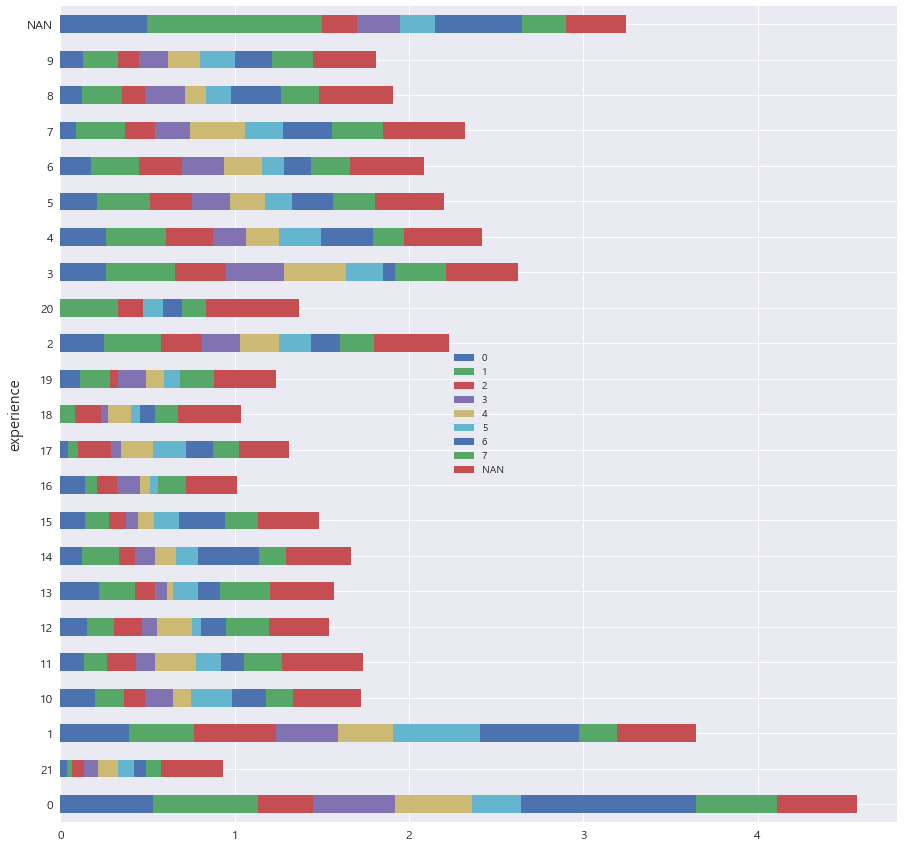

In [14]:
train.pivot_table(values='target', index='experience', 
                  columns='company_size', aggfunc='mean').plot.barh(figsize=(15, 15), stacked=True)

plt.legend(loc='center')
plt.show()

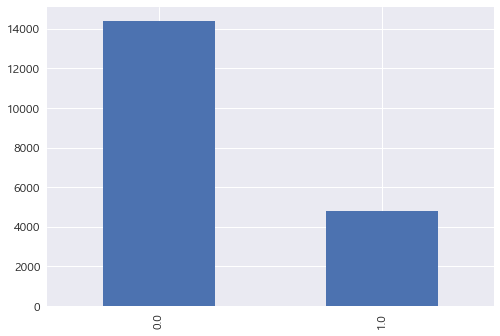

In [17]:
train['target'].value_counts().plot.bar()

plt.show()

In [1]:
## random_gb, gb, grid_rf, random_xgb
unknown_list = [0.789, 0.790, 0.797, 0.794]
KNN_list = [0.779, 0.778, 0.780, 0.781]

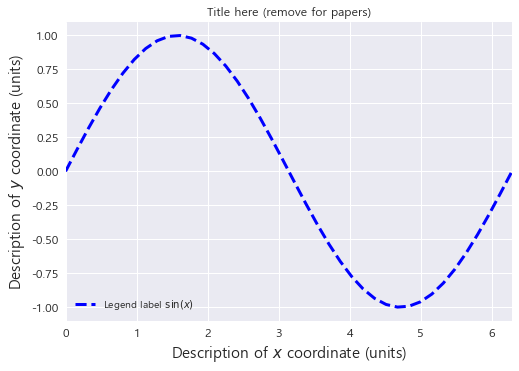

In [4]:
# Silly example data
bp_x = np.linspace(0, 2*np.pi, num=40, endpoint=True)
bp_y = np.sin(bp_x)

# Make the plot
plt.plot(bp_x, bp_y, linewidth=3, linestyle="--",
         color="blue", label=r"Legend label $\sin(x)$")
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Title here (remove for papers)")
plt.xlim(0, 2*np.pi)
plt.ylim(-1.1, 1.1)
plt.legend(loc="lower left")
plt.show()